In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
data=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

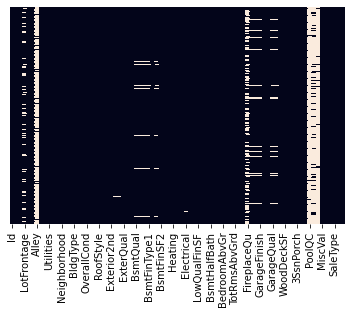

In [3]:
print(data.info())
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [4]:
train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
target=train['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)
combined=train.append(test)
combined.reset_index(inplace=True)
print(combined.shape)
null=pd.DataFrame(combined.isnull().sum().sort_values(ascending=False))[:25]
null.columns=['NullCount']
null.index.name='Feature'
print(null)
print(combined.info())

(2919, 81)
              NullCount
Feature                
PoolQC             2909
MiscFeature        2814
Alley              2721
Fence              2348
FireplaceQu        1420
LotFrontage         486
GarageCond          159
GarageYrBlt         159
GarageFinish        159
GarageQual          159
GarageType          157
BsmtExposure         82
BsmtCond             82
BsmtQual             81
BsmtFinType2         80
BsmtFinType1         79
MasVnrType           24
MasVnrArea           23
MSZoning              4
Utilities             2
BsmtHalfBath          2
BsmtFullBath          2
Functional            2
BsmtUnfSF             1
TotalBsmtSF           1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
index            2919 non-null int64
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street   

In [5]:
combined.drop(['PoolQC'],axis=1,inplace=True)
combined.drop(['MiscFeature'],axis=1,inplace=True)
combined.drop(['Alley'],axis=1,inplace=True)
combined.drop(['Fence'],axis=1,inplace=True)
combined.drop(['FireplaceQu'],axis=1,inplace=True)
combined.drop(['HouseStyle'],axis=1,inplace=True)
print(combined.shape)

(2919, 75)


In [6]:
combined.LotFrontage.fillna(combined.iloc[:1461].LotFrontage.mean(),inplace=True)
combined.MasVnrArea.fillna(combined.iloc[:1461].MasVnrArea.mean(),inplace=True)
combined.BsmtFinSF1.fillna(combined.iloc[:1461].BsmtFinSF1.mean(),inplace=True)
combined.BsmtFinSF2.fillna(combined.iloc[:1461].BsmtFinSF2.mean(),inplace=True)
combined.BsmtUnfSF.fillna(combined.iloc[:1461].BsmtUnfSF.mean(),inplace=True)
#combined.TotalBsmtSF.fillna(combined.iloc[:1461].TotalBsmtSf.mean(),inplace=True)
combined.BsmtFullBath.fillna(combined.iloc[:1461].BsmtFullBath.mean(),inplace=True)
combined.BsmtHalfBath.fillna(combined.iloc[:1461].BsmtHalfBath.mean(),inplace=True)
combined.GarageYrBlt.fillna(combined.iloc[:1461].GarageYrBlt.mean(),inplace=True)
combined.GarageCars.fillna(combined.iloc[:1461].GarageCars.mean(),inplace=True)
combined.GarageArea.fillna(combined.iloc[:1461].GarageArea.mean(),inplace=True)

In [7]:
combined.MSZoning.fillna(combined.iloc[:1461].MSZoning.mode()[0],inplace=True)
combined.GarageArea.fillna(combined.iloc[:1461].LotFrontage.mode()[0],inplace=True)
combined.Utilities.fillna(combined.iloc[:1461].Utilities.mode()[0],inplace=True)
combined.Exterior1st.fillna(combined.iloc[:1461].Exterior1st.mode()[0],inplace=True)
combined.Exterior2nd.fillna(combined.iloc[:1461].Exterior2nd.mode()[0],inplace=True)
combined.MasVnrType.fillna(combined.iloc[:1461].MasVnrType.mode()[0],inplace=True)
combined.BsmtQual.fillna(combined.iloc[:1461].BsmtQual.mode()[0],inplace=True)
combined.BsmtCond.fillna(combined.iloc[:1461].BsmtCond.mode()[0],inplace=True)
combined.BsmtExposure.fillna(combined.iloc[:1461].BsmtExposure.mode()[0],inplace=True)
combined.BsmtFinType1.fillna(combined.iloc[:1461].BsmtFinType1.mode()[0],inplace=True)
combined.BsmtFinType2.fillna(combined.iloc[:1461].BsmtFinType2.mode()[0],inplace=True)
combined.Electrical.fillna(combined.iloc[:1461].Electrical.mode()[0],inplace=True)
combined.KitchenQual.fillna(combined.iloc[:1461].KitchenQual.mode()[0],inplace=True)
combined.Functional.fillna(combined.iloc[:1461].Functional.mode()[0],inplace=True)
combined.GarageType.fillna(combined.iloc[:1461].GarageType.mode()[0],inplace=True)
combined.GarageFinish.fillna(combined.iloc[:1461].GarageFinish.mode()[0],inplace=True)
combined.GarageQual.fillna(combined.iloc[:1461].GarageQual.mode()[0],inplace=True)
combined.GarageCond.fillna(combined.iloc[:1461].GarageCond.mode()[0],inplace=True)
combined.SaleType.fillna(combined.iloc[:1461].SaleType.mode()[0],inplace=True)


In [8]:
print(combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 75 columns):
index            2919 non-null int64
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-

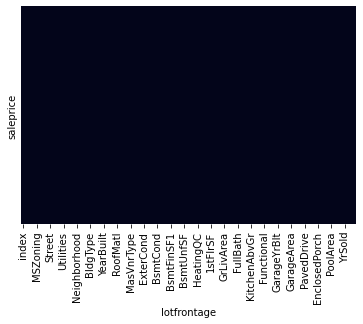

In [9]:
sns.heatmap(combined.isnull(),yticklabels=False,cbar=False)

plt.xlabel("lotfrontage")
plt.ylabel("saleprice")
plt.show()

In [10]:
print(combined.columns)

Index(['index', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

In [11]:
column=[ 'MSZoning','Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 'Neighborhood', 
'Condition1', 'Condition2', 'BldgType','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 
'Heating','HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional', 'GarageType','GarageFinish', 
'GarageQual','GarageCond','PavedDrive', 'SaleType','SaleCondition']



In [12]:
def computedummies(data):
    global combined
    dummies=pd.get_dummies(combined[data],prefix=data)
    combined=pd.concat([combined,dummies],axis=1)
    combined.drop(data,axis=1,inplace=True)
    print(combined.head())
    return combined
for i in column:
    combined=computedummies(i)
print(combined.shape())    

   index  Id  MSSubClass  LotFrontage  LotArea Street LotShape LandContour  \
0      0   1          60         65.0     8450   Pave      Reg         Lvl   
1      1   2          20         80.0     9600   Pave      Reg         Lvl   
2      2   3          60         68.0    11250   Pave      IR1         Lvl   
3      3   4          70         60.0     9550   Pave      IR1         Lvl   
4      4   5          60         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... MiscVal MoSold YrSold SaleType SaleCondition  \
0    AllPub    Inside  ...       0      2   2008       WD        Normal   
1    AllPub       FR2  ...       0      5   2007       WD        Normal   
2    AllPub    Inside  ...       0      9   2008       WD        Normal   
3    AllPub    Corner  ...       0      2   2006       WD       Abnorml   
4    AllPub       FR2  ...       0     12   2008       WD        Normal   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL MSZoning_RM  
0      

TypeError: 'tuple' object is not callable

In [13]:
train=combined.iloc[:1460]
test=combined.iloc[1460:]
print(test.shape)
train=train.loc[:,~train.columns.duplicated()]
print(train.shape)
test=test.iloc[:,~test.columns.duplicated()]
print(test.shape)

(1459, 264)
(1460, 264)
(1459, 264)


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost 
#from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier


In [15]:
xval=cross_val_score(RandomForestClassifier(),train,target,cv=5)
print(np.mean(xval))
rf=RandomForestClassifier()
xval=cross_val_score(xgboost.XGBRegressor(),train,target,cv=5)
print(np.mean(xval))


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.013013698630136985
0.854789172843683


In [16]:
classifier=xgboost.XGBRegressor()
classifier.fit(train,target)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [17]:
#import pickle
#filename='finalized_model.pkl'
#pickle.dump(classifier,open(filename,'wb'))

#ypred=classifier.predict(test)
#print(ypred)

In [18]:
min_child_weight=[1,2,3,4]
max_depth=[2,3,5,10,15]
learning_rate=[0.05,0.1,0.15,0.2]
n_estimators=[100,500,900,1100,1500]
booster=['gbtree','gblinear']
hyprerparameter={
    'learning_rate':learning_rate,'max_depth':max_depth,'booster':booster,'n_estimators':n_estimators,
    'min_child_weight':min_child_weight
}
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(estimator=classifier,cv=5,n_iter=50,param_distributions=hyprerparameter,
                      scoring='neg_mean_absolute_error',n_jobs=4,verbose=5,return_train_score=True,random_state=42)

In [19]:
random_cv.fit(train,target)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   18.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 14.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster=None,
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_...
                                          verbosity=None),
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'booster': ['gbtree', 'gblinear'

In [20]:
print(random_cv.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)


In [21]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=None, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [22]:
regressor.fit(train,target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [23]:
import pickle
filename='finalized_model.pkl'
pickle.dump(classifier,open(filename,'wb'))

ypred=classifier.predict(test)
print(ypred)

[129500.79 161180.7  181701.28 ... 169661.44 119238.44 212192.55]


In [24]:
pred=pd.DataFrame(ypred)
sub_df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv("Sample_submission.csv",index=False)